<a href="https://colab.research.google.com/github/a-brhian/Vibrations/blob/main/04_M%C3%A9todo_de_Runge_Kutta_de_4%C2%AA_ordem_(RK4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Runge-Kutta de 4ª ordem

Um suporte de motor sofre vibrações devido ao funcionamento do motor a combustão. Queremos prever o deslocamento e a velocidade do suporte ao longo do tempo, levando em conta o amortecimento do material e a excitação periódica do motor.

$$m\ddot{x}+c\dot{x}+kx=F_0 \cos(\omega t) $$

Para aplicar RK4, reescrevemos como um sistema:

$$
\begin{cases}
\dot{x} = v, \\[6pt]
\dot{v} = \dfrac{1}{m}\left(F_0 \cos(\omega t) - c v - k x\right)
\end{cases}
$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 #Parâmetros físicos
m = 1.0       # kg
c = 0.2       # N.s/m
k = 4.0       # N/m
F0 = 1.0      # N
omega = 1.5   # rad/s

# Condições iniciais
x0 = 0.0
v0 = 0.0

# Tempo de simulação
t0, tf, h = 0, 20, 0.01
t = np.arange(t0, tf+h, h)

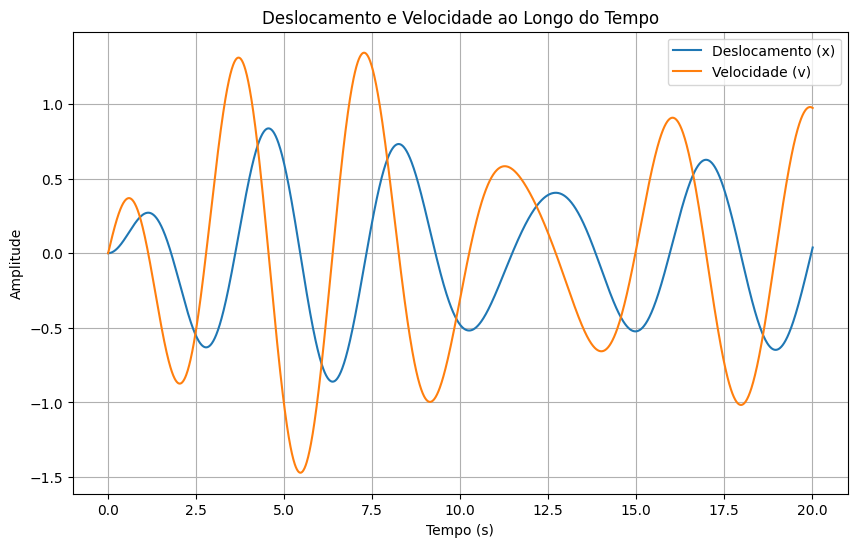

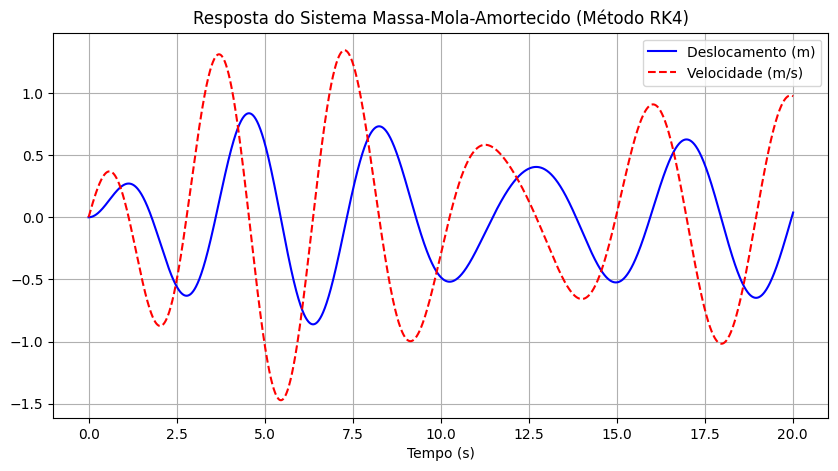

In [ ]:
# Gráfico
plt.figure(figsize=(10,5))
plt.plot(t, x, label='Deslocamento (m)', color='blue')
plt.plot(t, v, label='Velocidade (m/s)', color='red', linestyle='--')
plt.xlabel('Tempo (s)')
plt.grid(True)
plt.legend()
plt.title('Resposta do Sistema Massa-Mola-Amortecido (Método RK4)')
plt.show()

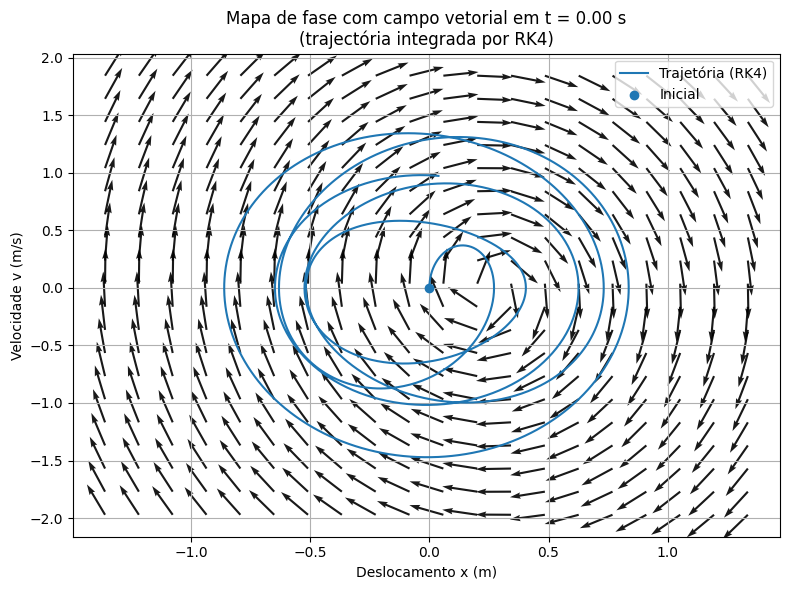

In [ ]:
# Código para rodar no Colab / Jupyter: mapa de fase com campo vetorial (quiver) e trajetória obtida por RK4.
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema (ajuste conforme desejar)
m = 1.0
c = 0.2
k = 4.0
F0 = 1.0
omega = 1.5

# Condições iniciais
x0, v0 = 0.0, 0.0

# Tempo de simulação
t0, tf, h = 0.0, 20.0, 0.01
t = np.arange(t0, tf+h, h)

# Sistema (dx/dt = v, dv/dt = ...)
def f(t, x, v):
    dxdt = v
    dvdt = (F0*np.cos(omega*t) - c*v - k*x) / m
    return dxdt, dvdt

# Integração por RK4 (explícita) para obter a trajetória
x = np.zeros_like(t)
v = np.zeros_like(t)
x[0], v[0] = x0, v0

for i in range(1, len(t)):
    k1x, k1v = f(t[i-1], x[i-1], v[i-1])
    k2x, k2v = f(t[i-1] + h/2, x[i-1] + h*k1x/2, v[i-1] + h*k1v/2)
    k3x, k3v = f(t[i-1] + h/2, x[i-1] + h*k2x/2, v[i-1] + h*k2v/2)
    k4x, k4v = f(t[i-1] + h, x[i-1] + h*k3x, v[i-1] + h*k3v)
    x[i] = x[i-1] + (h/6)*(k1x + 2*k2x + 2*k3x + k4x)
    v[i] = v[i-1] + (h/6)*(k1v + 2*k2v + 2*k3v + k4v)

# Preparar grade para campo vetorial (ajustando a faixa com base na trajetória)
x_min, x_max = np.min(x), np.max(x)
v_min, v_max = np.min(v), np.max(v)
x_margin = max(0.5, 0.1*(x_max - x_min + 1e-9))
v_margin = max(0.5, 0.1*(v_max - v_min + 1e-9))

x_vals = np.linspace(x_min - x_margin, x_max + x_margin, 20)
v_vals = np.linspace(v_min - v_margin, v_max + v_margin, 20)
X, V = np.meshgrid(x_vals, v_vals)

# OBS: o sistema é não-autônomo (tem termo F0*cos(omega*t)).
# Mostraremos o campo vetorial para um tempo fixo t_field (por exemplo, t=0).
t_field = 0.0
U, W = f(t_field, X, V)  # U = dx/dt, W = dv/dt

# Normalizar vetores para visual mais uniforme
magnitude = np.sqrt(U**2 + W**2)
# evitar divisão por zero
magnitude[magnitude == 0] = 1.0
U_norm = U / magnitude
W_norm = W / magnitude

# Plot: mapa de fase com campo vetorial (quiver) e trajetória
plt.figure(figsize=(8,6))
plt.quiver(X, V, U_norm, W_norm, angles='xy', scale=20, alpha=0.9)
plt.plot(x, v, label='Trajetória (RK4)')
plt.scatter([x[0]], [v[0]], marker='o', label='Inicial', zorder=5)
plt.xlabel('Deslocamento x (m)')
plt.ylabel('Velocidade v (m/s)')
plt.title(f'Mapa de fase com campo vetorial em t = {t_field:.2f} s\n(trajectória integrada por RK4)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#Pendulo simples (revisitado)

$$
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) = 0
$$

$$
\begin{cases}
\frac{d\theta}{dt} = \omega \\[2mm]
\frac{d\omega}{dt} = -\frac{g}{L} \sin(\theta)
\end{cases}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do pêndulo
g = 9.81     # gravidade (m/s²)
L = 1.0      # comprimento (m)
dt = 0.01    # passo de tempo (s)
t_max = 10   # tempo máximo de simulação (s)

# Condições iniciais
theta0 = np.radians(75)  # 45 graus
omega0 = 0.0

# Funções derivadas
def f(t, y):
    theta, omega = y
    dtheta = omega
    domega = -(g/L) * np.sin(theta)
    return np.array([dtheta, domega])

In [ ]:
# Implementação do RK4
t = np.arange(0, t_max, dt)
y = np.zeros((len(t), 2))
y[0] = [theta0, omega0]

for i in range(len(t)-1):
    k1 = f(t[i], y[i])
    k2 = f(t[i] + dt/2, y[i] + dt/2*k1)
    k3 = f(t[i] + dt/2, y[i] + dt/2*k2)
    k4 = f(t[i] + dt,   y[i] + dt*k3)
    y[i+1] = y[i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

theta, omega = y[:,0], y[:,1]

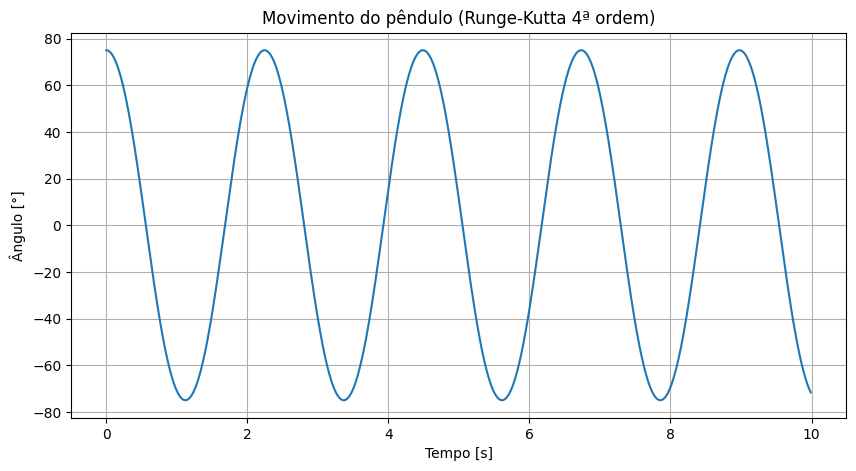

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t, np.degrees(theta))
plt.xlabel('Tempo [s]')
plt.ylabel('Ângulo [°]')
plt.title('Movimento do pêndulo (Runge-Kutta 4ª ordem)')
plt.grid(True)
plt.show()

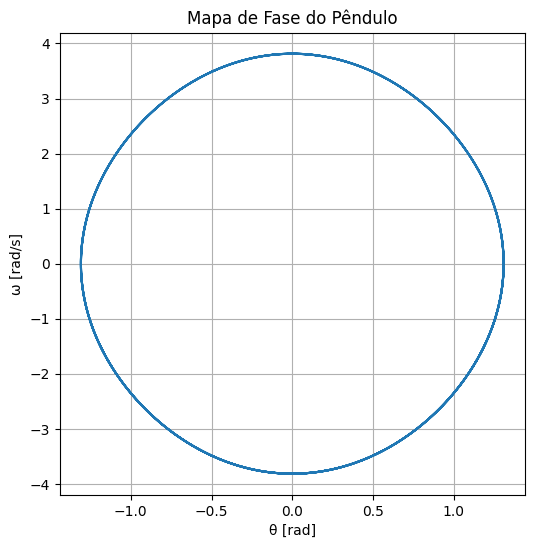

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(theta, omega)
plt.xlabel('θ [rad]')
plt.ylabel('ω [rad/s]')
plt.title('Mapa de Fase do Pêndulo')
plt.grid(True)
plt.show()

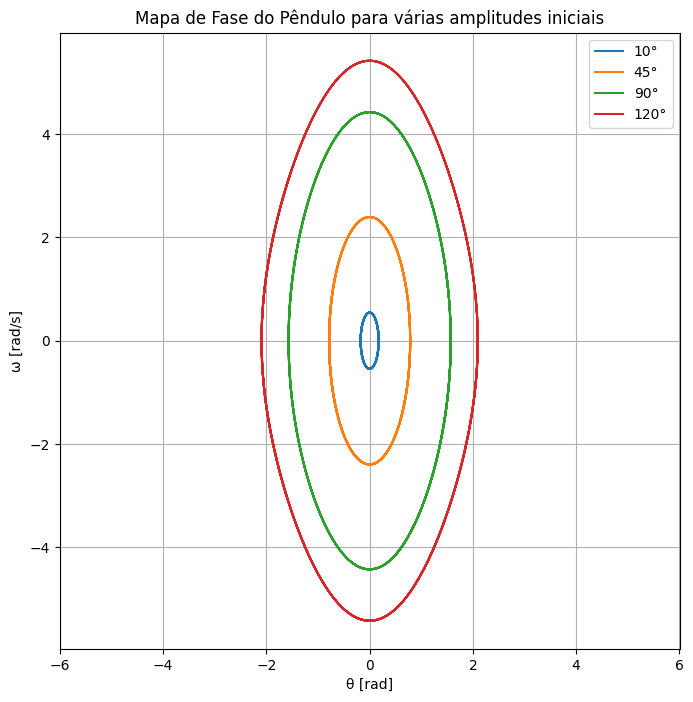

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do pêndulo
g = 9.81     # gravidade (m/s²)
L = 1.0      # comprimento (m)
dt = 0.01    # passo de tempo (s)
t_max = 10   # tempo máximo de simulação (s)

# Função derivadas para o RK4
def f(t, y):
    theta, omega = y
    return np.array([omega, -(g/L) * np.sin(theta)])

# RK4
def runge_kutta(theta0, omega0, t):
    y = np.zeros((len(t), 2))
    y[0] = [theta0, omega0]
    for i in range(len(t)-1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2*k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2*k2)
        k4 = f(t[i] + dt,   y[i] + dt*k3)
        y[i+1] = y[i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y[:,0], y[:,1]

# Amplitudes iniciais a testar (em graus)
amplitudes = [10, 45, 90, 120]

plt.figure(figsize=(8,8))

for amp in amplitudes:
    theta0 = np.radians(amp)
    omega0 = 0.0
    theta, omega = runge_kutta(theta0, omega0, np.arange(0, t_max, dt))
    plt.plot(theta, omega, label=f'{amp}°')

plt.xlabel('θ [rad]')
plt.ylabel('ω [rad/s]')
plt.title('Mapa de Fase do Pêndulo para várias amplitudes iniciais')
plt.grid(True)
plt.axis('equal')  # força mesma escala em x e y
plt.legend()
plt.show()


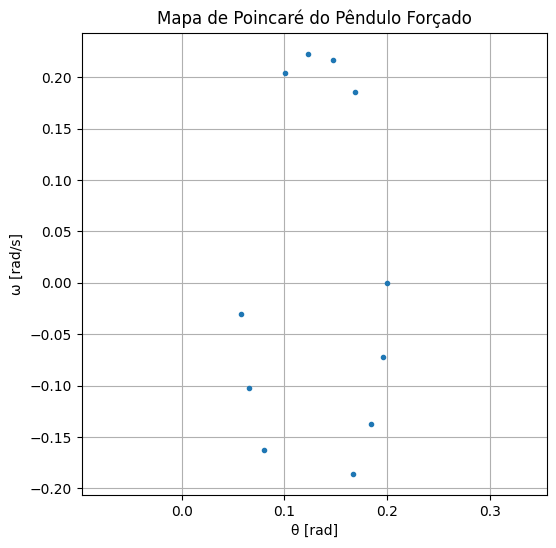

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do pêndulo
g = 9.81
L = 1.0
dt = 0.01
t_max = 100   # tempo longo para ver padrão recorrente

# Pêndulo forçado: d²θ/dt² + (g/L) sinθ = A cos(Ω t)
A = 1.2   # amplitude da força
Omega = 2/3  # frequência da força

def f(t, y):
    theta, omega = y
    dtheta = omega
    domega = -(g/L)*np.sin(theta) + A*np.cos(Omega*t)
    return np.array([dtheta, domega])

# RK4
def runge_kutta(theta0, omega0, t):
    y = np.zeros((len(t),2))
    y[0] = [theta0, omega0]
    for i in range(len(t)-1):
        k1 = f(t[i], y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2*k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2*k2)
        k4 = f(t[i] + dt,   y[i] + dt*k3)
        y[i+1] = y[i] + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y[:,0], y[:,1]

# Condições iniciais
theta0 = 0.2
omega0 = 0.0
t = np.arange(0, t_max, dt)
theta, omega = runge_kutta(theta0, omega0, t)

# Mapa de Poincaré: registrar a cada período da força
period = 2*np.pi/Omega
indices = np.arange(0, len(t), int(period/dt))
theta_p = theta[indices]
omega_p = omega[indices]

# Plot
plt.figure(figsize=(6,6))
plt.plot(theta_p, omega_p, 'o', markersize=3)
plt.xlabel('θ [rad]')
plt.ylabel('ω [rad/s]')
plt.title('Mapa de Poincaré do Pêndulo Forçado')
plt.grid(True)
plt.axis('equal')
plt.show()
